## Kompresija podataka

---

QR rastav s pivotiranjem stupaca možemo koristiti za __kompresiju (sažimanje) podataka__.

> Dijagonalni elementi matrice $R$ padaju po apsolutnoj vrijednosti pa možemo odrezati djelove matrica $Q$ i $R$ za koje smatramo da nisu značajni.

Dat ćemo primjer kompresije slike.

In [3]:
using Images, ImageMagick, FixedPointNumbers, Colors

INFO: Precompiling module ImageMagick.


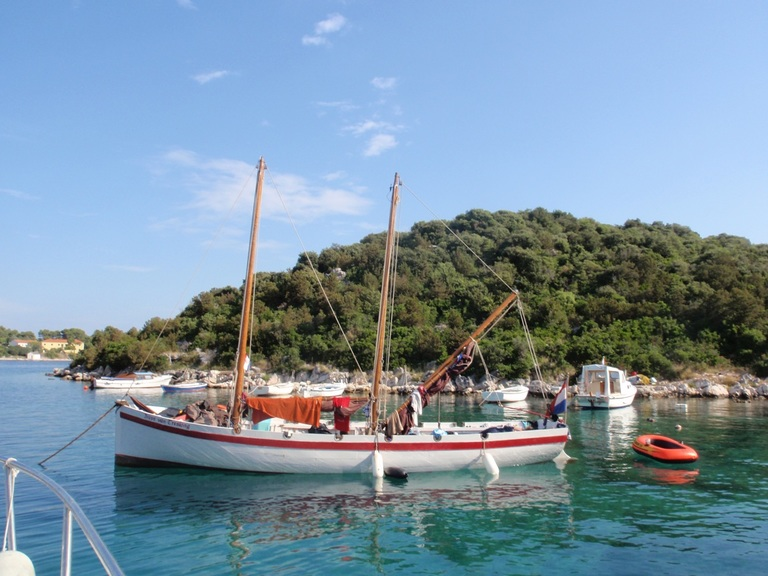

In [4]:
img=load("P8040001a.jpg")

In [5]:
# Opis podataka
show(img)

RGB Images.Image with:
  data: 768×576 Array{ColorTypes.RGB{FixedPointNumbers.UFixed{UInt8,8}},2}
  properties:
    colorspace: sRGB
    spatialorder:  x y

In [6]:
img[1,1]

In [7]:
show(img[1,1])

RGB{U8}(0.439,0.624,0.843)

In [8]:
# Razdvojimo sliku na R, G i B komponentu
imgsep=separate(img)
show(imgsep)

RGB Images.Image with:
  data: 576×768×3 Array{FixedPointNumbers.UFixed{UInt8,8},3}
  properties:
    colorspace: RGB
    colordim: 3
    spatialorder:  y x

In [9]:
R=data(imgsep[:,:,1])
G=data(imgsep[:,:,2])
B=data(imgsep[:,:,3])

576×768 Array{FixedPointNumbers.UFixed{UInt8,8},2}:
 UFixed{UInt8,8}(0.843)  UFixed{UInt8,8}(0.843)  …  UFixed{UInt8,8}(0.969)
 UFixed{UInt8,8}(0.851)  UFixed{UInt8,8}(0.847)     UFixed{UInt8,8}(0.965)
 UFixed{UInt8,8}(0.843)  UFixed{UInt8,8}(0.847)     UFixed{UInt8,8}(0.961)
 UFixed{UInt8,8}(0.839)  UFixed{UInt8,8}(0.843)     UFixed{UInt8,8}(0.961)
 UFixed{UInt8,8}(0.851)  UFixed{UInt8,8}(0.847)     UFixed{UInt8,8}(0.953)
 UFixed{UInt8,8}(0.847)  UFixed{UInt8,8}(0.847)  …  UFixed{UInt8,8}(0.957)
 UFixed{UInt8,8}(0.839)  UFixed{UInt8,8}(0.843)     UFixed{UInt8,8}(0.957)
 UFixed{UInt8,8}(0.847)  UFixed{UInt8,8}(0.847)     UFixed{UInt8,8}(0.953)
 UFixed{UInt8,8}(0.855)  UFixed{UInt8,8}(0.855)     UFixed{UInt8,8}(0.957)
 UFixed{UInt8,8}(0.855)  UFixed{UInt8,8}(0.851)     UFixed{UInt8,8}(0.961)
 UFixed{UInt8,8}(0.855)  UFixed{UInt8,8}(0.851)  …  UFixed{UInt8,8}(0.957)
 UFixed{UInt8,8}(0.859)  UFixed{UInt8,8}(0.855)     UFixed{UInt8,8}(0.953)
 UFixed{UInt8,8}(0.855)  UFixed{UInt8,8}(0.855) 

In [10]:
# Izračunajmo QR rastav s pivotiranjem matrice svakog kanala
pivot=true
qR,rR,pR=qr(float(R),Val{true})
qG,rG,pG=qr(float(G),Val{true})
qB,rB,pB=qr(float(B),Val{true})

(
Float32[-0.0409507 -0.0472236 … -0.0534491 0.0111139; -0.0413333 -0.0470717 … 0.095268 -0.0214313; … ; -0.0434382 0.0101664 … 0.00277229 0.0298886; -0.0434382 0.011143 … -0.00227653 -0.00854417],

Float32[-20.4934 -13.4352 … -14.8847 -19.6737; 0.0 -8.03055 … -6.6359 -0.271917; … ; 0.0 0.0 … -0.000143835 -0.000319662; 0.0 0.0 … 0.00082379 0.00149118],

[14,647,238,490,124,622,260,342,378,537  …  759,123,166,762,146,764,55,766,767,36])

In [11]:
norm(qR*rR[:,invperm(pR)]-float(R))

0.00011816641f0

In [12]:
using Winston

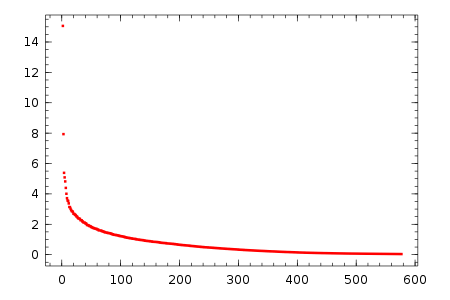

In [13]:
# Nacrtajmo dijagonalne elemente
plot(abs(diag(rR)),"r.")

In [14]:
# Izračunajmo komprimirane matrice za svaki kanal
k=50
Rcompressed=qR[:,1:k]*rR[1:k,invperm(pR)]
Gcompressed=qG[:,1:k]*rG[1:k,invperm(pG)]
Bcompressed=qB[:,1:k]*rB[1:k,invperm(pB)]

576×768 Array{Float32,2}:
 0.849219  0.849419  0.849612  0.848984  …  0.951222  0.951216  0.952343
 0.850834  0.850978  0.851206  0.850909     0.951578  0.951397  0.951979
 0.854565  0.855033  0.855641  0.854221     0.952285  0.95225   0.954134
 0.856747  0.856969  0.857194  0.85476      0.952851  0.953513  0.954645
 0.860758  0.860863  0.861023  0.859647     0.951366  0.952204  0.9542  
 0.859466  0.859761  0.860209  0.860274  …  0.949736  0.949303  0.950518
 0.856315  0.856868  0.857974  0.858545     0.954989  0.953994  0.954867
 0.853424  0.854004  0.854706  0.856621     0.959859  0.958582  0.95789 
 0.855778  0.856114  0.856438  0.858546     0.950205  0.948848  0.947465
 0.857619  0.85837   0.858482  0.859991     0.956397  0.954145  0.952858
 0.861171  0.862008  0.862343  0.86251   …  0.953244  0.951111  0.950526
 0.862288  0.863157  0.863619  0.863754     0.949253  0.947282  0.946622
 0.862025  0.862261  0.863018  0.862675     0.952246  0.951357  0.951381
 ⋮                       


(process:30169): GLib-CRITICAL **: g_datalist_id_dup_data: assertion 'key_id != 0' failed


In [15]:
# Odrezimo elemente <0 i >1
Rcompressed=min(max(Rcompressed,0),1)
Gcompressed=min(max(Gcompressed,0),1)
Bcompressed=min(max(Bcompressed,0),1)

576×768 Array{Float32,2}:
 0.849219  0.849419  0.849612  0.848984  …  0.951222  0.951216  0.952343
 0.850834  0.850978  0.851206  0.850909     0.951578  0.951397  0.951979
 0.854565  0.855033  0.855641  0.854221     0.952285  0.95225   0.954134
 0.856747  0.856969  0.857194  0.85476      0.952851  0.953513  0.954645
 0.860758  0.860863  0.861023  0.859647     0.951366  0.952204  0.9542  
 0.859466  0.859761  0.860209  0.860274  …  0.949736  0.949303  0.950518
 0.856315  0.856868  0.857974  0.858545     0.954989  0.953994  0.954867
 0.853424  0.854004  0.854706  0.856621     0.959859  0.958582  0.95789 
 0.855778  0.856114  0.856438  0.858546     0.950205  0.948848  0.947465
 0.857619  0.85837   0.858482  0.859991     0.956397  0.954145  0.952858
 0.861171  0.862008  0.862343  0.86251   …  0.953244  0.951111  0.950526
 0.862288  0.863157  0.863619  0.863754     0.949253  0.947282  0.946622
 0.862025  0.862261  0.863018  0.862675     0.952246  0.951357  0.951381
 ⋮                       

In [16]:
norm(float(R)-Rcompressed)/norm(float(R))

0.029813822f0

In [17]:
# Definirajmo komprimiranu 3d matricu
imgcsep=similar(imgsep)
imgcsep[:,:,1]=Rcompressed
imgcsep[:,:,2]=Gcompressed
imgcsep[:,:,3]=Bcompressed

576×768 Array{Float32,2}:
 0.849219  0.849419  0.849612  0.848984  …  0.951222  0.951216  0.952343
 0.850834  0.850978  0.851206  0.850909     0.951578  0.951397  0.951979
 0.854565  0.855033  0.855641  0.854221     0.952285  0.95225   0.954134
 0.856747  0.856969  0.857194  0.85476      0.952851  0.953513  0.954645
 0.860758  0.860863  0.861023  0.859647     0.951366  0.952204  0.9542  
 0.859466  0.859761  0.860209  0.860274  …  0.949736  0.949303  0.950518
 0.856315  0.856868  0.857974  0.858545     0.954989  0.953994  0.954867
 0.853424  0.854004  0.854706  0.856621     0.959859  0.958582  0.95789 
 0.855778  0.856114  0.856438  0.858546     0.950205  0.948848  0.947465
 0.857619  0.85837   0.858482  0.859991     0.956397  0.954145  0.952858
 0.861171  0.862008  0.862343  0.86251   …  0.953244  0.951111  0.950526
 0.862288  0.863157  0.863619  0.863754     0.949253  0.947282  0.946622
 0.862025  0.862261  0.863018  0.862675     0.952246  0.951357  0.951381
 ⋮                       

In [18]:
show(imgcsep)

RGB Images.Image with:
  data: 576×768×3 Array{FixedPointNumbers.UFixed{UInt8,8},3}
  properties:
    colorspace: RGB
    colordim: 3
    spatialorder:  y x

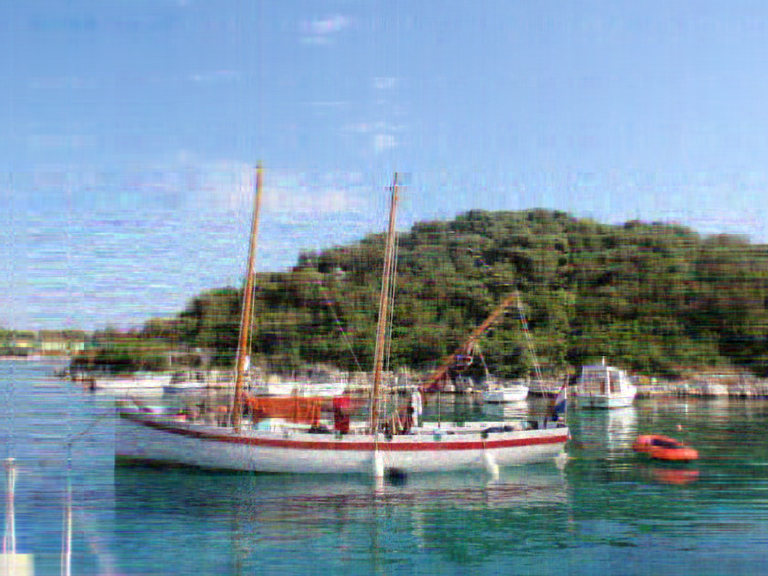

In [20]:
imgc = convert(Images.Image{RGB}, imgcsep)

In [21]:
# Pogledajmo kako raste kvaliteta
using Interact

Interact.Slider{Int64}(Signal{Int64}(50, nactions=0),"",50,50:10:150,"d",true)

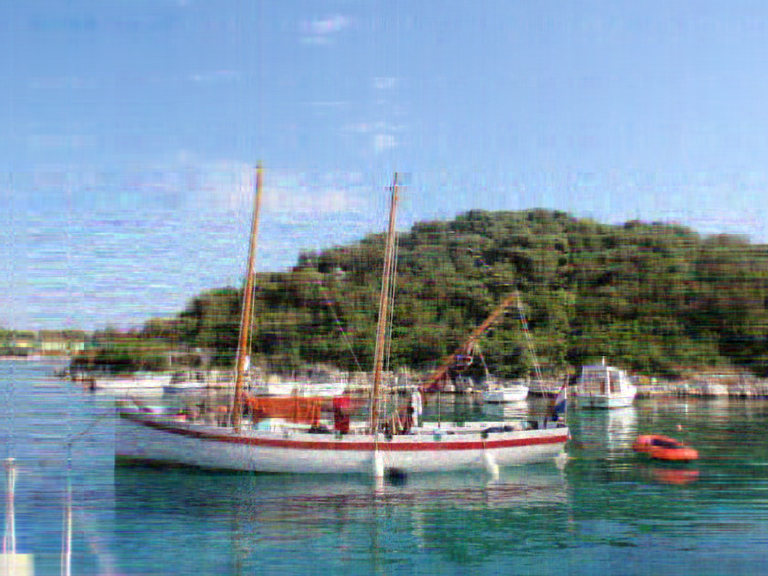

In [22]:
@manipulate for k in slider(50:10:150,value=50)
    Rcompressed=qR[:,1:k]*rR[1:k,invperm(pR)]
    Gcompressed=qG[:,1:k]*rG[1:k,invperm(pG)]
    Bcompressed=qB[:,1:k]*rB[1:k,invperm(pB)]
    Rcompressed=min(max(Rcompressed,0),1)
    Gcompressed=min(max(Gcompressed,0),1)
    Bcompressed=min(max(Bcompressed,0),1)
    imgcsep[:,:,1]=Rcompressed
    imgcsep[:,:,2]=Gcompressed
    imgcsep[:,:,3]=Bcompressed
    imgc = convert(Images.Image{RGB}, imgcsep)
    imgc
end    

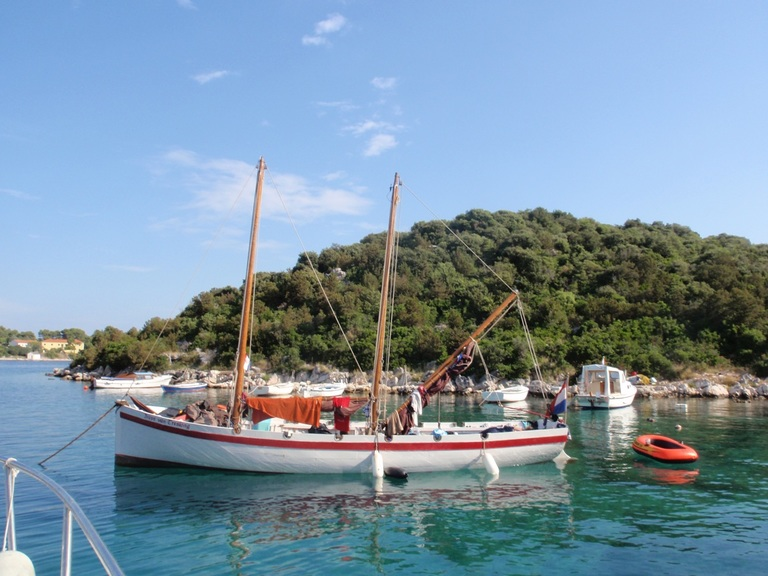

In [23]:
# Usporedimo s originalnom slikom
img